# Computer Project for TMA4215

$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\DeclareMathOperator{\CQR}{CQR}
\DeclareMathOperator{\QR}{QR}
\DeclareMathOperator{\TR}{TR}
\DeclareMathOperator{\CTR}{CTR}
\DeclareMathOperator{\SR}{SR}
\DeclareMathOperator{\CSR}{CSR}
\DeclareMathOperator{\NCR}{NCR}
\DeclareMathOperator{\MR}{MR}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\PP}{\mathbb{P}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
#css_styling()

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from scipy.sparse import identity, dok_matrix
from scipy.sparse.linalg import factorized
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import pandas as pd 

## Part 2: The Heat Equation

We now return to numerical methods for ODE. The main goal
of this part  to develop a solver for the __classical heat equation__
\begin{alignat*}{3}
\partial_t u - \kappa \Delta u &= f
&& \quad \text{in } \Omega  \times (t_0, T)
\subset \RR^2 \times \RR,
\\
u &= u_D && \quad  \text{on } \partial \Omega  \times (t_0, T)
\subset \RR^2 \times \RR
\\
u(\cdot,t_0) &= u_0
&&\quad \text{in } \Omega.
\end{alignat*}
and this will be accomplished by
transforming the heat equation into an (large) ODE system
with the help of the finite difference method.

### Chapter 1: The Crank-Nicolson and $\theta$-Method for ODEs

#### Task 1: Derivation of the Crank-Nicolsen method

We recall the initial value problem for ordinary differential equations:

Given a function $f: [0,T] \times \RR^n \to \RR^n$ and initial value
$y_0 \in \RR$, find $y: [0,T] \to \RR^n$ such that
\begin{align}
y'(t) &= f(t,y(t)) \quad t \in (0,T),
\tag{1a}
\\
y(0) &= y_0.
\tag{1b}
\end{align}

Recall the integral representation of (1a)-(1b) and apply the trapezoidal rule to the integral. 

__a__) How does the resulting one-step method look like?

__b__) Is this a Runge-Kutta method? Write down the Butcher table. 

<font color=blue> 
<b>Solution:</b><br>

**a)** The integral representation from the lectures of the initial value problem $(1\text{a})$ is: 
$$
y(t_{i+1}) - y(t_i) = \int_{t_i}^{t_{i+1}} f(t, y(t))\dt,
$$

Applying the trapezoidal rule to the integral gives the following one-step method:

$$
y(t_{i+1}) = y_{i+1} = y_i + \frac{1}{2} \tau (f(t_{i}, y_{i}) + f(t_{i+1}, y_{i+1})),
$$
$$
y(t_0) = y(0) = y_0
$$

**b)** A Runge-Kutta method is defined by:

$$
\begin{align}
Y_{j} &= y_i +  \tau \sum_{l=1}^{s} {a}_{jl} f(t_i + c_l \tau, Y_l) \quad \text{for } j = 1,\ldots s, \\
y_{i+1} &= y_i + \tau \sum_{j=0}^s b_j f(t_i + c_j \tau, Y_j),\\
\end{align}
$$

where a given scheme can be specified in the form of a Butcher table:
$$
\begin{align}
\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
c_1 & a_{11} & \cdots & a_{1s}
\\
\vdots & \vdots & & \vdots
\\
c_s & a_{s1} & \cdots & a_{ss}
\\
\hline
& b_1 & \cdots & b_s
\end{array}
\end{align}
$$

The following butcher table represents the trapezoidal rule:
$$
\begin{align}
\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0
\\
1 & 1/2 & 1/2
\\
\hline
& 1/2 & 1/2
\end{array}
\end{align}
$$

Writing out the expression for $y_{i+1}$, $Y_1$, and $Y_2$ with the formulas given for Runge-Kutta methods, we get:

$$
\begin{align}
Y_{1} &= y_i, 
\\
Y_{2} &= y_i + \tau \frac{1}{2}(f(t_i, Y_1) + f(t_{i+1}, Y_2)),
\\
y_{i+1} &= y_i + \tau \frac{1}{2}f(t_i, Y_1) + f(t_{i+1}, Y_2)).
\end{align}
$$

Evidently, $Y_2 = y_{i+1}$ and hence we get:

$$
\begin{equation}
y_{i+1} = y_i + \tau \frac{1}{2}(f(t_i, y_i) + f(t_{i+1}, y_{i+1})),
\end{equation}
$$

which is the formula for the trapezoidal method.
</font>

#### Task 2: The the $\theta$-method

For $\theta \in [0,1]$, define the one-step theta method by

$$
y_{i+1} = y_i + h(\theta f(t_{i+1}, y_{i+1}) + (1-\theta)  f(t_{i}, y_{i})),
$$
so for a given $\theta$, a weighted sum/convex combination 
of $f(t_{i+1}, y_{i+1})$ and $f(t_{i}, y_{i})$ is taken.

__a__) Write down the Butcher table.

__b__) Which known schemes to you get for $\theta=0,1,0.5$?

__c__) Use the __order conditions__ to determine the consistency order of the   $\theta$-method.

__d__) Determine the stability function for $\theta$-method.

<font color=blue> 
<b>Solution:</b><br>
**a)** Once again, we write out the expressions for $y_{i+1}, Y_1$ and $Y_2$ to find the elements of the Butcher table. We have

$$
\begin{align}
y_{i+1} &= y_i + \tau(\theta f(t_i + 1 \cdot \tau, Y_2) + (1 - \theta) f(t_i + 0 \cdot \tau, Y_1) \\
Y_2 &= y_{i+1} = y_i + \tau(\theta f(t_i + 1 \cdot \tau, Y_2) + (1-\theta) f(t_i, Y_1)) \\
Y_1 &= y_i = y_i + \tau(0 \cdot f(t_i + \tau, Y_2) + 0 \cdot f(t_i, Y_1)).\\
\end{align}
$$

Thus, we get that the Butcher table for the one-step theta method is
$$
\begin{align}
\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0
\\
1 & (1-\theta) & \theta
\\
\hline
& (1 - \theta) & \theta
\end{array}
\end{align}
$$

<br><br>
**b)** 
$\theta = 0 \Rightarrow y_{i+1} = y_i + h f(t_i, y_i) \rightarrow$ Euler's method. <br>
$\theta = 1 \Rightarrow y_{i+1} = y_i + h f(t_{i+1}, y_{i+1}) \rightarrow$ Backward Euler.<br>
$\theta = 0.5 \Rightarrow y_{i+1} = y_i + \frac{1}{2}h (f(t_{i+1}, y_{i+1}) + f(t_i, y_i)) \rightarrow$ Trapezoidal rule.

<br><br>
**c)** Order conditions:<br>
<u>p = 1:</u> $\sum_i b_i = 1$ for all $\theta$. Thus all $\theta$ statisfy the order condition for order 1. <br>
<u>p = 2:</u> $\sum_i b_i c_i = (1 - \theta) \cdot 0 + \theta \cdot 1 = \theta$. The order condition for order 2 is that this sum should equal $\frac{1}{2}$, hence only $\theta = 0.5$ satisfies this order condition.

Using these results, we get that $\theta= 0, \theta = 1$ has order of consistency 1, while $\theta = 0.5$ has order of consistency 2. 

<br><br>
**d)** We use the test-equation
$$
y' = \mu y, 
$$

to find the stability function for the $\theta$-method. With $z = \tau \mu$ we get:

\begin{align}
y_{i+1} &= y_i + \tau \theta f(t_{i+1}, y_{i+1}) + \tau (1-\theta) f(t_i, y_i)
\\
&= y_i + z \theta y_{i+1} + z (1-\theta) y_i
\\
&= \frac{1+z-z\theta}{1-z\theta}y_i
\end{align}

Hence the stability function for the theta-method is:
$$
R(z) = \frac{1+z-z\theta}{1-z\theta}.
$$

This means that given $\lambda \in \mathbb{C}^{-}$, in each step we need $h$ and $\theta$ such that $|R(z)| < 1$ for the method to be stable.  
</font>

#### Task 3

Implement the $\theta$ method and compute the numerical solution to simple initial value 
problem
$$
y' = \mu y 
\\
y(0) = y_0.
$$

__a__) Implement the general $\theta$-method and validate your implementation
by computing the numerical solution for
initial value problem on the interval $(0,1)$ for $y_0=1$, $\mu = 1$, including a 
convergence/EOC test as we did before.

In [6]:
g = lambda x,mu: np.exp(mu*x) #exact solution

def theta_method(y0, mu, t0, T, n, theta=0.5):
    ys = [y0]
    ts = [t0]
    dt = (T - t0)/n
            
    for i in range(1,n+1):
        ys.append((ys[-1]*(1+mu*dt*(1-theta))/(1-theta*mu*dt)))
        ts.append(ts[-1]+dt)
        
    return (np.array(ts), np.array(ys))


N_list = [8, 16, 32, 64]


theta_list=[0,0.5,1]
EOC=[]
for theta in theta_list:
    errs = []
    eoc=[]
    for N in N_list:
        ts,ys = theta_method(1,1,0,1,N,theta)
        y = g(ts,1)
        err=abs(ys-y)
        errs.append(max(err))
    for i in range(1,len(errs)):
        eoc.append((np.log(errs[i])-np.log(errs[i-1]))/(np.log(N_list[i-1])-np.log(N_list[i])))
    EOC.append(eoc)

df = pd.DataFrame({r"$\theta=0$":EOC[0], r"$\theta=0.5$":EOC[1],r"$\theta=1$":EOC[2]})
df.style.hide_index()
    

AttributeError: 'Styler' object has no attribute 'hide_index'

__b)__ Now for $\mu \in \{-10, -100, -1000\}$, define the reference step length
$\tau_{\mu} = \dfrac{2}{|\mu|}$, plot the exact solutions, and compute and plot
the numerical solution for $\tau \in \{ 5\tau_{\mu}, \tau_{\mu}, 1/5\tau_{\mu} \}$
and $\theta \in \{0, 0.5, 1\}$ What do you oberserve and why?

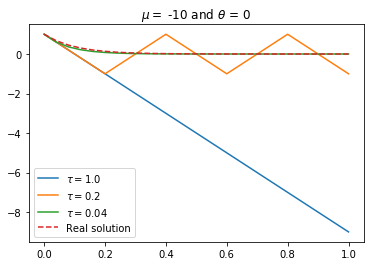

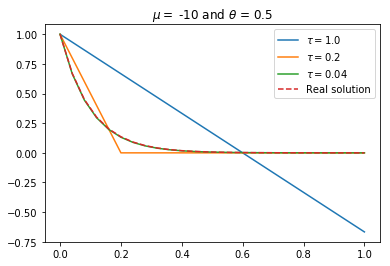

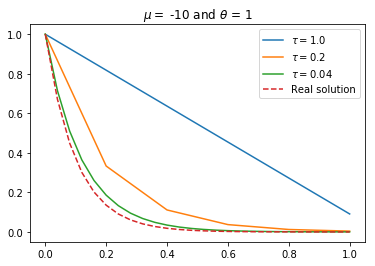

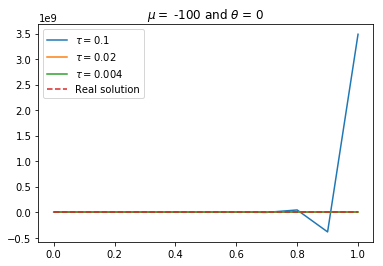

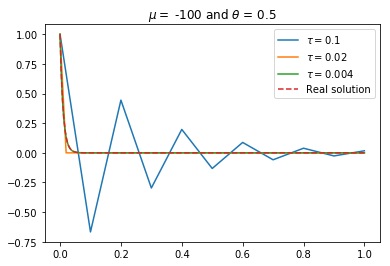

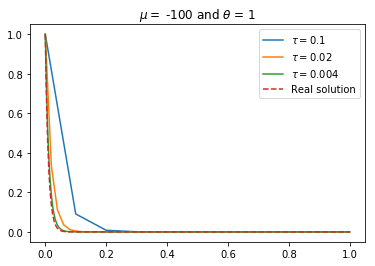

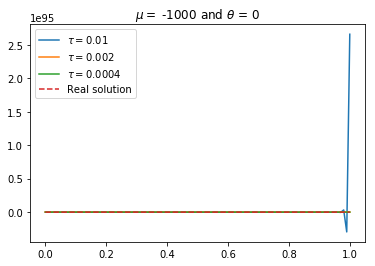

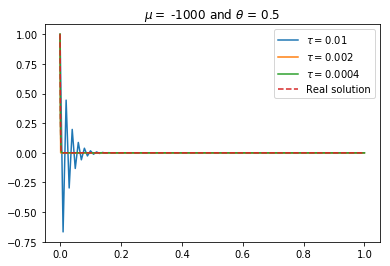

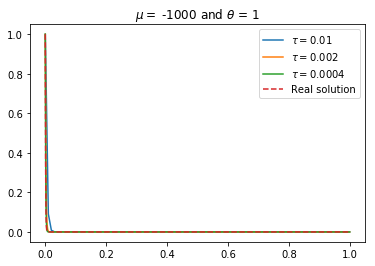

In [7]:
#%matplotlib notebook

mu_list=[-10,-100,-1000]
theta_list=[0,0.5,1]
y0=1
t0=0
T = 1

for mu in mu_list:
    tau_mu = 2/abs(mu)
    tau_list = [5*tau_mu,tau_mu,tau_mu/5]
    for theta in theta_list:
        plt.figure()
        for tau in tau_list:
            ts,ys=theta_method(y0,mu,t0,T,int((T-t0)/tau),theta)
            plt.plot(ts,ys,label = (r"$\tau=$"+str(tau))) 
        plt.plot(ts,g(ts,mu),label="Real solution",linestyle='dashed')
        plt.title(r"$\mu=$ " +str(mu) + r' and $\theta$ = ' + str(theta))   
        plt.legend()
        plt.show()


        


<font color=blue>
In the case $\theta=0$ the stability function gives that we must have $|z+1|<1$ for the method to be stable. We observe that this value of $\theta$ the solution diverges when we have $\tau= 5\tau_{\mu}$ corresponding to $z=-10$. It oscillates when $\tau= \tau_{\mu}$, corresponding to $z=-2$, and converges to the real solution when $\tau = 1/5\tau_{\mu}$,corresponding to $z=-0.4$. This is as expected. 

In the cases $\theta=1$ and $\theta=0.5$ the solution converges for all tested values of $\tau$. This comes from the fact that the stability area for these two methods covers all negative values for z. 
</font>

### Chapter 2: The $\theta$-method for the heat equation

In this part, we combine the $\theta$ scheme and the finite difference method 
as space discretization to solve the heat equation

\begin{alignat*}{3}
\partial_t u  - \Delta u  &= f  \quad && \text{in } \Omega \times (0,T]
\\
u &= g_D \quad && \text{on } \partial \Omega \times (0, T]
\\
u(x,0) &=  u_0(x) \quad && \text{in } \Omega
\end{alignat*}
 
with initial value $u_0$ and bounday value $g_D$. As before $\Omega = [0,1]^2$.

As in Chapter 2 of part 1, a grid of $N = (n+1)^2$ grid points
$$
\{(x_j,y_j)\}_{i,j=0}^n = \{(ih,jh) \in [0,1]^2: 0\leqslant i,j \leqslant n \}
$$ are defined with the grid size $h = 1/n$.

Now we discretize in space first, starting from the idea that
\begin{align}
f(x,y,t) &= \partial_t u(x,y,t)  - \Delta u(x,y,t)
\nonumber
\\
&\approx \partial_t u(x,y,t)- (\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )u(x,y,t)
\nonumber
\end{align}

Since we have a partial differential equation which depends on time,
the idea is to associate with each grid point $(x_i,y_j)$ a 
__time-dependent__ unknown $U_{i,j}(t)$. Then, using the finite difference method 
in space to discretize the Poisson operator $-\Delta$, we end up with the following
__system of ordinary differential equations__:

Find $U(t) = \{U_{i,j}\}_{i,j=0}^n \in \RR^{(n+1)^2} = \RR^N$ such that
\begin{align}
&\dfrac{d}{dt}U_{i,j}(t) 
-(\partial_x^+ \partial_x^- + \partial_y^+\partial_y^-) U_{ij}(t)
\nonumber
\\
=
&\dfrac{d}{dt}U_{i,j}(t) + \dfrac{4 U_{i,j}(t) - U_{i+1,j}(t) - U_{i,j+1}(t) - U_{i-1, j}(t) -  U_{i, j-1}(t)}{h^2}
\nonumber
\\
= & f(x_i, y_j,t) =: F_{ij}(t) \quad \text{for } i,j = 1,\ldots n-1,
\tag{2a}
\\
U_{i,j}(0) &= u_0(x_i, y_j) \quad \text{for } i,j = 0,\ldots n,
\tag{2b}
\end{align}
together with the boundary conditions
\begin{gather}
U_{i,j}(t) = g_D(x_i, y_j, t) \quad \text{for } (i,j) \in \{0,\ldots, N\} \times \{0,N\}
\cup \{0,N\}  \times \{0,\ldots, N\}.
\tag{2c}
\end{gather}

This is often also called a __semi-discretization (in space)__ of the heat equation (since we only discretized the equation in space but not yet in time).

Next, we subdivide $(0,T)$ into $m$ subintervals defined by the points
$\{t_k\}_{k=0}^m$ with $t_k = \tfrac{k T}{m}$,
and apply the $\theta$ method to the ODE system (2a).
We write $U_{i,j}^k$ for the approximation of $U_{i,j}(t_k)$,
$F_{i,j}^k = F_{i,j}(t_k)$,
and introduce $\overline{\theta} = 1 - \theta$.
Then after reordering terms we need to solve
\begin{align}
&\phantom{=} U_{i,j}^{k+1} 
+\tau \theta \dfrac{4 U_{i,j}^{k+1} - U_{i+1,j}^{k+1} - U_{i,j+1}^{k+1} - U_{i-1, j}^{k+1} -  U_{i, j-1}^{k+1}}{h^2}
\nonumber
\\
&= U_{i,j}^{k} -\tau \overline{\theta} \dfrac{4 U_{i,j}^{k} - U_{i+1,j}^{k} - U_{i,j+1}^{k} - U_{i-1, j}^{k} -  U_{i, j-1}^{k}}{h^2}   + \tau \theta F_{ij}^{k+1} + \tau \overline{\theta} F_{ij}^{k}
\quad \text{for } i,j = 1,\ldots n-1,
\tag{3a}
\\
U_{i,j}(0) &= u_0(x_i, y_j) \quad \text{for } i,j = 0,\ldots n,
\tag{3b}
\end{align}
together with the boundary conditions
\begin{align}
U_{i,j}^{k+1} = g_D(x_i, y_j, t_{k+1}) \quad 
&\text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,N\}  \times \{0,\ldots, n\}
\nonumber
\\
&\text{for } k = 1, \ldots, m.
\tag{3c}
\end{align}


Finally, we need to translate (3a)-(3c) into a linear  system.
We introduce again as for the 2D Poisson problem an index mapping $\NN^2 \ni (i,j) \mapsto I(i,j) \in \NN$ to translate the double index into a single index $I = I(i,j) \in \RR^N$, $N=(n+1)^2$. Then applying the $\theta$ scheme to (2a) results in the
following method:

* Set $U^0 = \{U^0_{I}\}_{I=0}^{N-1} \in \RR^N$ with $U^0_{I(i,j)} = u_0(x_i, y_j)$ 
 for $i,j = 0,\ldots n$.
* For $k=0,\ldots, m-1$, compute $U^{k+1} \in \RR^N$ by solving the
linear system
 \begin{align}
 (\Id + \tau \theta A)U^{k+1}
= B^{k+1}
\tag{4}
\end{align}

Note this is only the case if $\theta > 0$, for $\theta = 0$ we have an explicit solver.
Here $\Id$ is the $N \times N$ identity matrix, and $A$ is the $N\times N$ matrix
resulting from the finite difference operator after index-remapping, and
with $A_{I,I} = 0$ for those index $I$ which correspond to a boundary index tuple
$(i,j)$. So $A$ is in principal the same matrix you implemented
in Part 1, Chapter 2, Task 3 but __without__ the extra modifications to set
boundary conditions.

The right-hand side $B^{k+1} \in \RR^{N}$ is computed as follows. First compute
$$
B^{k+1} := (\Id - \tau \overline{\theta} A)U^{k}
+ \tau \theta F^{k+1} + \tau \overline{\theta} F^{k}.
$$
To incorporate the boundary conditions, you now modify $B^{k+1}$
for those index $I$ which correspond to a boundary index tuple 
$(i,j)$ by setting
$$
B^{k+1}_{I(i,j)} = g_D(x_i, y_j, t_{k+1}) \quad 
\text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}.
$$
Since $A_{I,I}= 0$ for those indices, we then see that
$$
 ((\Id + \tau \theta A)U^{k+1})_{I} = U^{k+1}_{I} = B^{k+1}_{I} = g_D(x_i, y_j, t_{k+1}),
$$
so $U^{k+1}$ satisfy our boundary condition at the boundary grid points at $t_{k+1}$.

#### Task 4

Implement the resulting solver to solve the heat equation. Reuse as much code
as possible from Part 1, Chapter 2 on the 2D Poisson problem, in particular
the generation of the finite difference matrix and the implementation of 
boundary conditions.

For code validation, use analytical reference function of the form
$$
u(x,y,t) = \sin(k x) \sin(l y)\exp(-\mu t)
$$
on $\Omega = [0,2\pi]^2$ and $t_0 = 0$ and $T = 1$.
for some integers $k, l$ and a constant $\mu$.

__a__) Find $\mu = \mu(k,l)$ so that u(x,y,t) is a solution of the
heat equation with $f = 0$.

__b__) For $\theta \in \{0, 0.5, 1\}$ compute the numerical solution with initial data and boundary data corresponding to the function you determined in __a__)
on a number of grids with $n = \{10, 20, 40, 80\}$ corresponding to grid sizes $h = \{2\pi/10, 2\pi/20, 2\pi/40, 2\pi/80\}$.

For each of the $h$'s, choose the corresponding time step $\tau = h/(2\pi)$
to run your simulation and create an animation for

* the exact solution;
* the numerical solution;
* the error function defined by $E_{i,j}^k = U^k_{i,j} - u(x_i, y_i, t_k)$.

__c__) For the simulation you ran in __b__) compute the total error as
as a function of $n$,
$$
\mathrm{err(n)} = \max_{k} \max_{i,j} | U^k_{i,j} - u(x_i, y_i, t_k) |
$$
What error convergence rates do you obtain for the various $\theta$?

<font color=blue>
<b>Solution:</b><br>

**a)** The heat equation is 

$$
\partial_t u - \Delta u = f = 0.
$$

Using our function $u(x, y, t) = \sin(kx) \sin(ly) \exp(-\mu t)$, we obtain

$$
\begin{split}
-\mu(k, l) \sin(kx) \sin(ly) \exp(-\mu t) + k^2 \sin(kx) \sin(ly) \exp(-\mu t) &+ l^2 \sin(kx) \sin(ly) \exp(-\mu t) = 0 \\
\Rightarrow (-\mu(k, l) + k^2 + l^2) u(x, y, t) &= 0 \\
\Rightarrow -\mu(k, l) + k^2 + l^2 &= 0 \\
\Rightarrow \mu(k, l) = k^2 + l^2.
\end{split}
$$
<br><br>
**b)** Numerical solution:
</font>

<font color = blue>**b)** The numerical solution:

In the following two cells are the functions needed to calculate and plot exact and numerical solutions.</font> 

In [8]:
# Code from Part 1, Chapter 2

# Define index mapping
def I(i, j, n):   
    return i + j*(n+1)



#Modified function from earlier. No boudary conditions and changed gridsize(introduced new parameters)
def fdm2dMatrixSparse(n, I, x0, x1):
    h = (x1 - x0)/n  #Gridsize
    N = (n+1)*(n+1)  # Total number of unknowns

    A =  sp.dok_matrix((N, N))
    
    # Define FD entries of A
    hh = h*h
    for i in range(1, n):  
        for j in range(1, n): 
            A[I(i,j,n),I(i,j,n)] = 4/hh # U_ij
            A[I(i,j,n),I(i-1,j,n)] = -1/hh  # U_{i-1,j}
            A[I(i,j,n),I(i+1,j,n)] = -1/hh  # U_{i+1,j}
            A[I(i,j,n),I(i,j-1,n)] = -1/hh  # U_{i,j-1}
            A[I(i,j,n),I(i,j+1,n)] = -1/hh  # U_{i,j+1}
         
    return A


#Define f = 0
def f(x, y, t):
    return x*0 + y*0


#Setting constants defining the problem 
k , l = 1 , 2
mu = k**2 + l**2

#Define the exact solution at given point in space and time
def u_ex(x, y, t):
    return np.exp(-mu*t)*np.sin(k*x)*np.sin(l*y)



#Function for creating a list of matrices for the exact solution in time(for plotting later)
def calculate_exact_sol(n, x, y, u_ex, tau):
    X,Y = np.meshgrid(x,y,sparse=True)
    
    # Store U in a list for animation plot
    U_list = [u_ex(X, Y, 0)]

    # Evaluate exact solution at each time step and store it
    t = 0
    while t < T:
        t+= tau
        U = u_ex(X, Y, t)
        U_list.append(U)
    
    return U_list


#given code for plotting
def _plot_frame_fdm_solution(i, ax, X, Y, U_list, title, zlim=None):
    ax.clear()
    line  = ax.plot_surface(X, Y, U_list[i],             
            rstride=1, cstride=1, # Sampling rates for the x and y input data
            cmap=cm.viridis)      # Use the new fancy colormap viridis
    if zlim is not None:
        ax.set_zlim(zlim)
    total_frame_number = len(U_list)
    complete_title = title + (" (Frame %d of %d)" % (i,total_frame_number))
    ax.set_title(complete_title)
    return line

def plot_2D_animation(X, Y, U_list, title='', duration=10, zlim=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
 
    fargs = (ax,X,Y,U_list, title, zlim)
    frame_plotter = _plot_frame_fdm_solution

    frames = len(U_list)
    interval = duration/frames*1000
    ani = animation.FuncAnimation(fig, frame_plotter, 
            frames=len(U_list), fargs=fargs, 
            interval=interval, blit=False, repeat=True)
    return ani

In [9]:
#The function for solving the heat equation(finding a list of matrices that represent the numerical solution)
#given a grid, the boundary conditions, time interval, time step, theta. 
def solveHeatEq(I, U_0_grid, f, g, theta, tau, t0, T, X, Y):

    t = t0
    A = fdm2dMatrixSparse(n, I, X[0,0], X[0,-1])   
    N = (n+1)**2
    matrix = sp.dok_matrix(np.identity(N)) 
    matrix = matrix + tau*theta*A
    matrix_csc = matrix.tocsc()  
    solve = factorized(matrix_csc)
    
    U_list = [U_0_grid]
    U = U_0_grid.ravel()
    F_grid = f(X, Y, t)
    F = F_grid.ravel()
    
    while t < T:
        t += tau
        
        F1_grid = f(X, Y, t)
        F1 = F1_grid.ravel()
        Q= sp.dok_matrix(np.identity(N) - tau*(1-theta)*A)
        B = np.dot(Q.toarray(),U) + tau*theta*F1 + tau*(1-theta)*F

        # Incorporate boundary conditions
        for j in [0,n]:
            for i in range(0,n+1):
                B[I(i,j,n)] = g(X[0,i], Y[j,0], t)
        for i in [0,n]:
            for j in range(1,n):
                B[I(i,j,n)] = g(X[0,i], Y[j,0], t)
                
        U = solve(B)
        U_list.append(U.reshape((n+1,n+1)))
        F = F1
        
    return U_list

<font color = blue> In the following two cells all the exact and numerical solutions as well as the error-functions are calculated for different values of N and theta. </font>

In [ ]:
t0,T = 0, 1
N = [10, 20, 40, 80]
L = 2*np.pi

Exact_solutions = [] #List with exact solutions for different values of n.
Numerical_solutions_thalf = [] #List of numerical solutions for all n with theta = 0.5
Numerical_solutions_tone = [] # List of numerical solutions for all n with theta = 1
Numerical_solutions_tzero = [] #List of numerical solutions for all n with theta = 0
Meshgrids_x = []  #Lists for storing the 
Meshgrids_y = []  #grids for later use

for n in N:
    print(n)
    #Generate grid
    xi = np.linspace(0,L,n+1)
    yi = np.linspace(0,L,n+1)
    X,Y = np.meshgrid(xi,yi,sparse=True)
    Meshgrids_x.append(X)
    Meshgrids_y.append(Y)
    tau = 1/n   #h/2pi
    U_0_grid = u_ex(X, Y, 0)
    
    Exact_solutions.append(calculate_exact_sol(n, X, Y, u_ex, tau))
    Numerical_solutions_thalf.append(solveHeatEq(I, U_0_grid, f,  u_ex, 0.5, tau, t0, T, X, Y))
    Numerical_solutions_tone.append(solveHeatEq(I, U_0_grid, f,  u_ex, 1, tau, t0, T, X, Y))
    Numerical_solutions_tzero.append(solveHeatEq(I, U_0_grid, f,  u_ex, 0, tau, t0, T, X, Y))
    


10
20
40
80


In [ ]:
#Caluculating error functions
Error_thalf = [] #theta = 0.5
Error_tone = []  #theta = 1
Error_tzero = [] #theta = 0

#Lists(one for each theta) storing total error for different n
Max_error_thalf = []
Max_error_tone = []
Max_error_tzero = []
        
#Calculating the errorfunctions and total error
for i in range(len(Numerical_solutions_thalf)):
    err_half = []
    err_one = []
    err_zero = []
    max_err_thalf = 0
    max_err_tone = 0
    max_err_tzero = 0
    
    for j in range(len(Numerical_solutions_thalf[i])):
        err_half.append(Numerical_solutions_thalf[i][j]-Exact_solutions[i][j])
        err_one.append(Numerical_solutions_tone[i][j]-Exact_solutions[i][j])
        err_zero.append(Numerical_solutions_tzero[i][j]-Exact_solutions[i][j])
        max_err_thalf = max(max_err_thalf, (Numerical_solutions_thalf[i][j]-Exact_solutions[i][j]).max())
        max_err_tone = max(max_err_tone, (Numerical_solutions_tone[i][j]-Exact_solutions[i][j]).max())
        max_err_tzero = max(max_err_tzero, (Numerical_solutions_tzero[i][j]-Exact_solutions[i][j]).max())
        
    Error_thalf.append(np.array(err_half))
    Error_tone.append(np.array(err_one))
    Error_tzero.append(np.array(err_zero))
    Max_error_thalf.append(max_err_thalf)
    Max_error_tone.append(max_err_tone)
    Max_error_tzero.append(max_err_tzero)


<font color = blue> Below are some plots of the solutions for different values of theta and n as well as the exact solution. The solutions for all given values of theta and n have been calculated above making it easy to plot different solutions by making small changes to the code. 

There are separate lists for all values of theta and different elements correspond to different n: index 0 equals n = 10, index 1 equals n = 20, index 2 equals n = 40 and index 3 equals n = 80. </font>

In [ ]:
%matplotlib notebook

# Exact solution, n = 80
ani = plot_2D_animation(Meshgrids_x[3], Meshgrids_y[3], Exact_solutions[3], title='', duration=10, zlim=(-1,1))

In [ ]:
%matplotlib notebook

# n = 40, theta = 0
ani = plot_2D_animation(Meshgrids_x[3], Meshgrids_y[3], Numerical_solutions_tzero[3], title='', duration=10, zlim=(-1,1))

In [ ]:
%matplotlib notebook

#n = 10, theta = 0.5
ani = plot_2D_animation(Meshgrids_x[0], Meshgrids_y[0], Numerical_solutions_thalf[0], title='', duration=10, zlim=(-1,1))

In [ ]:
%matplotlib notebook

# n = 40, theta = 0.5
ani = plot_2D_animation(Meshgrids_x[2], Meshgrids_y[2], Numerical_solutions_thalf[2], title='', duration=10, zlim=(-1,1))

In [ ]:
%matplotlib notebook

# n = 80, theta = 0.5
ani = plot_2D_animation(Meshgrids_x[3], Meshgrids_y[3], Numerical_solutions_thalf[3], title='', duration=10, zlim=(-1,1))

In [ ]:
%matplotlib notebook

# n = 40, theta = 1
ani = plot_2D_animation(Meshgrids_x[2], Meshgrids_y[2], Numerical_solutions_tone[2], title='', duration=10, zlim=(-1,1))

<font color = blue> Below we have plotted the error function for some values of theta and n. </font>

In [ ]:
%matplotlib notebook

# n = 40, theta = 0
ani = plot_2D_animation(Meshgrids_x[2], Meshgrids_y[2], Error_tzero[2], title='', duration=10, zlim=(-1,1))

In [ ]:
%matplotlib notebook

# n = 40, theta = 0.5
ani = plot_2D_animation(Meshgrids_x[2], Meshgrids_y[2], Error_thalf[2], title='', duration=10, zlim=(-1,1))

In [ ]:
%matplotlib notebook

# n = 80, theta = 0.5
ani = plot_2D_animation(Meshgrids_x[2], Meshgrids_y[2], Error_thalf[2], title='', duration=10, zlim=(-1,1))

In [ ]:
%matplotlib notebook

# n = 40, theta = 1
ani = plot_2D_animation(Meshgrids_x[2], Meshgrids_y[2], Error_tone[2], title='', duration=10, zlim=(-1,1))

<font color = blue>
    For $n\geq 40$, theta = 0 clearly does not give a correct numerical solution. This is reflected in the plot of the error function as well. As we saw above in task 3, theta = 0 is unstable for certain values, so this is to be expected. As is dicussed in greater detail in task 5, the time step needs to be very small for the method to converge with theta = 0 and the limit is proportional to $h^2 \sim 1/n^2$. As our $\tau$ is proportional to $1/n$, the solution gets **less** precise for higher n as $\tau$ is further away from the limit value. For this reason, the solutions for the lower values of n resemble the exact solution(at least within the given time-frame, they might diverge later on). 

For theta = 0.5 and theta = 1, the numerical solutions converges for all values of n. Higher number of n(and consequently smaller grid size and smaller corresponding time steps) give better results as is reflected in the plots of the corresponding errorfunctions. ((However, all numerical solutions found for these values of theta give qualitatively correct results.))



ER DET EGT SÅ MYE MER Å SI? TAR JO Å DISKUTERER FEILEN MER I C
   </font>

<font color = blue>**c)** We use the total error for each theta as a function of n computed above and find the order of convergence for each theta: </font> 


In [ ]:

#Caluculating EOC
N_list = [10, 20, 40, 80]

EOC_thalf = []
EOC_tone = []
EOC_tzero = []
for i in range(1,len(Max_error_thalf)):
    EOC_thalf.append((np.log(Max_error_thalf[i])-np.log(Max_error_thalf[i-1]))/(np.log(N_list[i-1])-np.log(N_list[i])))
    EOC_tone.append((np.log(Max_error_tone[i])-np.log(Max_error_tone[i-1]))/(np.log(N_list[i-1])-np.log(N_list[i])))
    EOC_tzero.append((np.log(Max_error_tzero[i])-np.log(Max_error_tzero[i-1]))/(np.log(N_list[i-1])-np.log(N_list[i])))
    
print("Theta = 0:\n", EOC_tzero)
print("Theta = 0.5:\n", EOC_thalf)
print("Theta = 1:\n", EOC_tone)

<font color = blue>
   For theta = 0, the values found for the convergence rates are seemingly random. The concept of an order of convergece is meaningless when the function does not converge. 
    
For theta = 0 and theta = 1, the order of convergence is about 2, which correspond well with what we found in task **2c)**
    </font>
    
    

#### Task 5

Finally,  we have a closer look at the so-called CFL (Courant-Friedrichs-Lewy) condition stating that in two space dimensions,
the explicit Euler scheme given by $\theta = 0$ needs to satisfy the __time-step restriction__
$$
\tau \leqslant h^2/4
$$
to render the full discretization scheme stable. This is related to __stiff systems__ and the concept of __$A$-stability__
and the __stability function__.

Now define $\tau$ as follows
$$
\tau = \alpha h^2/4
$$
with  a safety factor $\alpha$ and $h = 2\pi/n$ for some $n\in \NN$.

Choose $t_0 = 0$, $T=1$, $f = g_D = 0$ and
use as initial data the step function
\begin{align*}
u_0(x,y) = 
\begin{cases}
1 \quad \text{if } |x -  \pi| < \pi/3  \wedge |y -  \pi| < \pi/3
\\
0 \quad \text{else.}
\end{cases}
\end{align*}

__a__)
Solve the heat equation using the explicit Euler for $n = 20$ and corresponding 
time-step $\tau$ for $\alpha = 0.9, 1, 1.1$. What do you observe?
__b__
Repeat the experiment setting the end time to $T = 20$ and
$\alpha = 0.99, 1, 1.01$.  Observation? (That should demonstrate the strictness of the CFL condition.)



In [ ]:
def u_0_step(x, y):
    step = 0*np.ones_like(x)*np.ones_like(y)
    def is_inside(x, y):
        eps = 1e-10
        return  np.abs(x - np.pi) < np.pi/3  and np.abs(y - np.pi) < np.pi/3

    for i in range(x.shape[1]):
        for j in range(y.shape[0]):
            if is_inside(x[0,i], y[j,0]):
                step[i,j] = 1
    return step

#Defing the constants
L,n, t0, theta= 2*np.pi,20, 0, 0
h = 2*np.pi/n
alpha = [0.9,1,1.1,0.99, 1, 1.01]


#Creating grid
xi = np.linspace(0,L,n+1)
yi = np.linspace(0,L,n+1)
X,Y = np.meshgrid(xi,yi,sparse=True)
U_0_grid = u_0_step(X,Y)


#Calculating solutions
#T = 1
U_a1 = solveHeatEq(I, U_0_grid, f, f, theta,(alpha[0]*h**2)/4 , t0, 1, X, Y)
U_a2 = solveHeatEq(I, U_0_grid, f, f, theta,(alpha[1]*h**2)/4 , t0, 1, X, Y)
U_a3 = solveHeatEq(I, U_0_grid, f, f, theta,(alpha[2]*h**2)/4 , t0, 1, X, Y)
# T = 20
U_b1 = solveHeatEq(I, U_0_grid, f, f, theta,(alpha[3]*h**2)/4 , t0, 20, X, Y)
U_b2 = solveHeatEq(I, U_0_grid, f, f, theta,(alpha[4]*h**2)/4 , t0, 20, X, Y)
U_b3 = solveHeatEq(I, U_0_grid, f, f, theta,(alpha[5]*h**2)/4 , t0, 20, X, Y)

In [ ]:
#alpha = 0.9
ani = plot_2D_animation(X, Y, U_a1, title='', duration=10, zlim=(-1,1))

In [ ]:
#alpha = 1
ani = plot_2D_animation(X, Y, U_a2, title=r'$\alpha=1', duration=10, zlim=(-1,1))

In [ ]:
#alpha = 1.1
ani = plot_2D_animation(X, Y, U_a3, title='', duration=10, zlim=(-1,1))

<font color = blue>We obeserve that the solution is nice and stable for $\alpha = 0.9$ and $\alpha= 1$, and that it diverges for $\alpha = 1.1$ This is as expected from the time-step restriction. 
</font>

In [ ]:
#alpha = 0.99
ani = plot_2D_animation(X, Y, U_b1, title='', duration=20, zlim=(-1,1))

In [ ]:
#alpha = 1
ani = plot_2D_animation(X, Y, U_b2, title='', duration=10, zlim=(-1,1))

In [ ]:
#alpha = 1.01
ani = plot_2D_animation(X, Y, U_b3, title='', duration=20, zlim=(-1,1))

<font color = blue>The solution converges for $\alpha = 0.99$ and $\alpha = 1$, and diverges for $\alpha = 1.01$. This is also as expected, and shows the strictness of the time-step restriction.  </font>